In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. EDA

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate Analysis

## a. Categorical Data

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

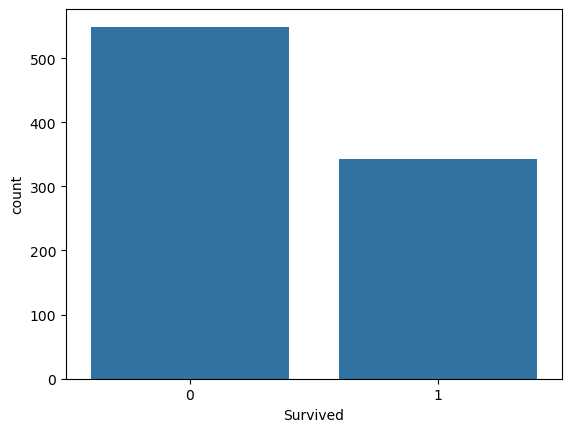

In [12]:
sns.countplot(x=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

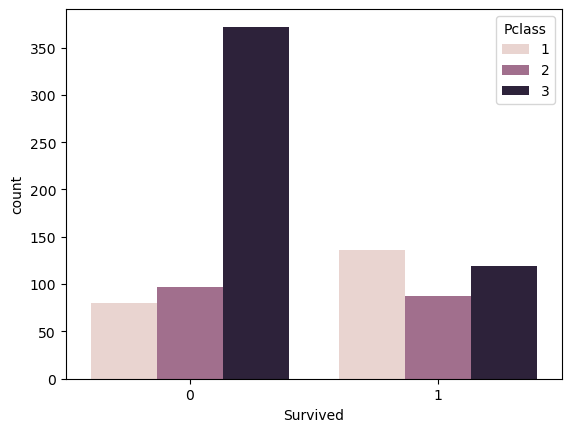

In [13]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

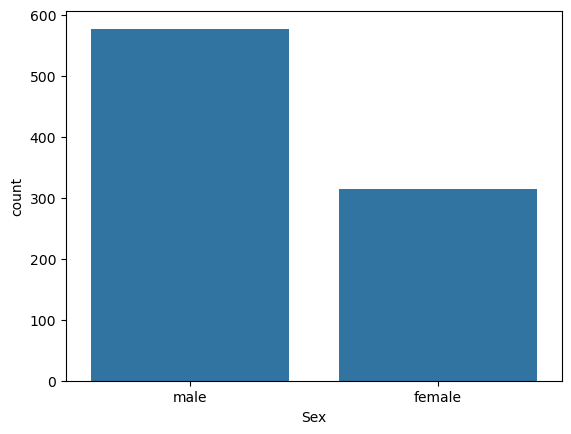

In [14]:
sns.countplot(x=df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

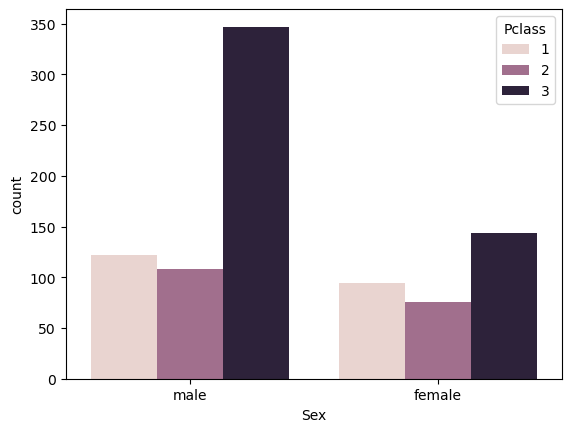

In [15]:
sns.countplot(x=df['Sex'], hue=df['Pclass'])

<AxesSubplot:ylabel='Survived'>

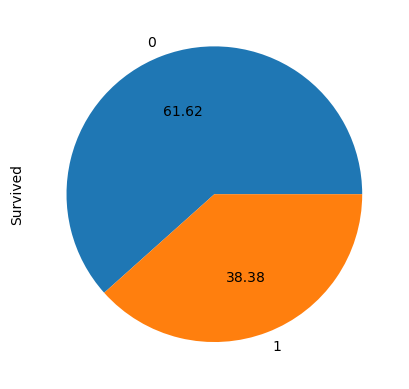

In [16]:
df['Survived'].value_counts().plot(kind='pie', label='Survived', autopct='%.2f')

## b. Numerical Data

<AxesSubplot:xlabel='Age', ylabel='Count'>

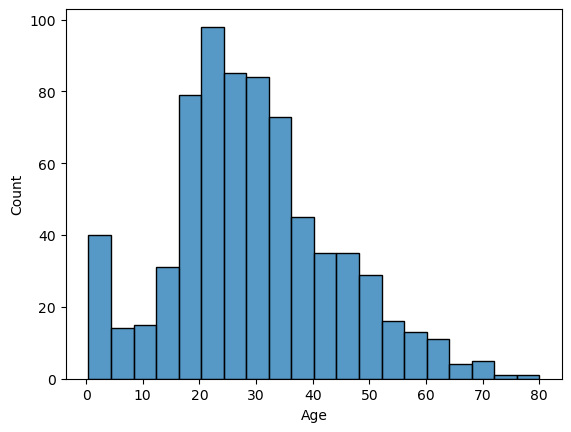

In [17]:
sns.histplot(df['Age'])

/tmp/ipykernel_3277/1052970539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

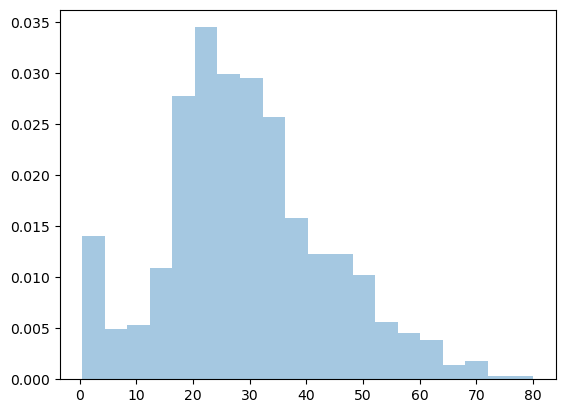

In [18]:
sns.distplot(df['Age'], kde=True)

<AxesSubplot:xlabel='Age'>

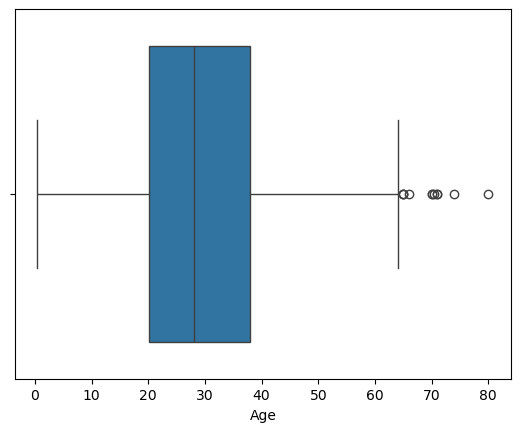

In [31]:
sns.boxplot(x= df['Age'])

In [19]:
df['Age'].min()

0.42

In [20]:
df['Age'].max()

80.0

In [22]:
df['Age'].mean()

29.69911764705882

In [23]:
df['Age'].skew()

0.38910778230082704

# Bivariate And MultiVariate Analysis

## a. Scatterplot (N-N)

In [28]:
tips = pd.read_csv('tips.csv')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

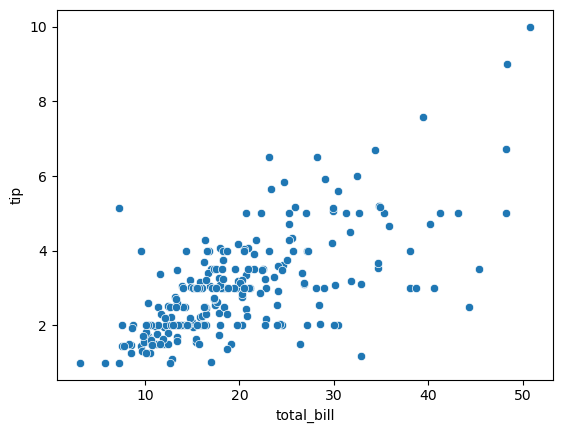

In [29]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])

## b. Bar Plot (N-C)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

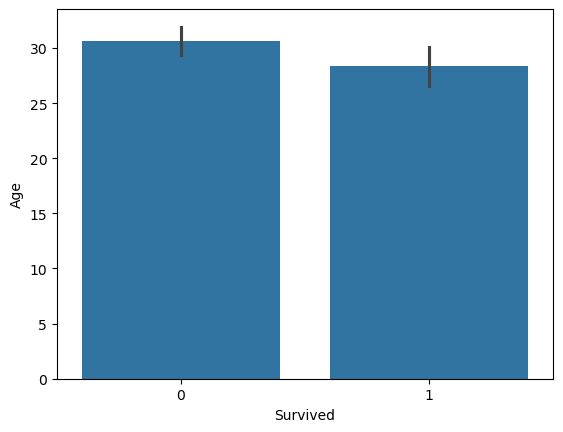

In [39]:
sns.barplot(x=df['Survived'], y=df['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

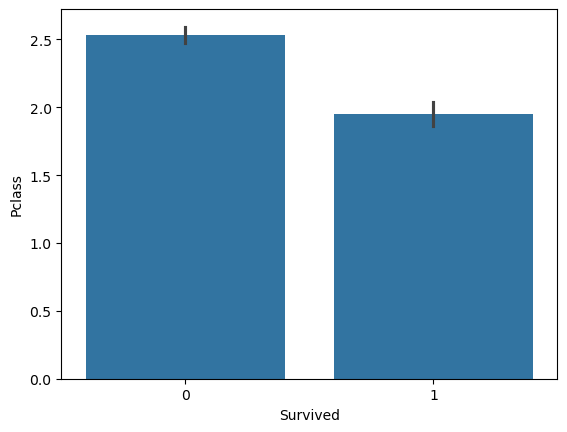

In [40]:
sns.barplot(x=df['Survived'], y=df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

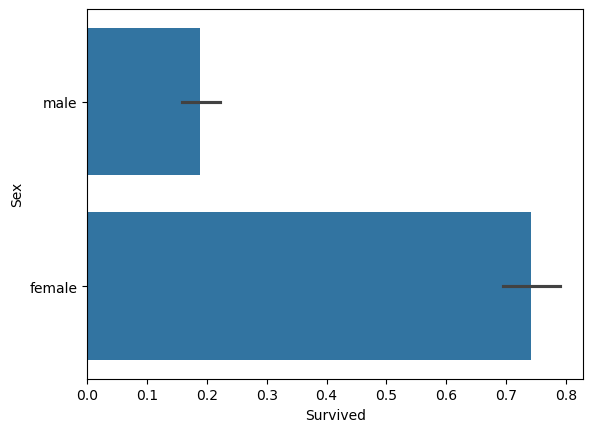

In [41]:
sns.barplot(x=df['Survived'], y=df['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

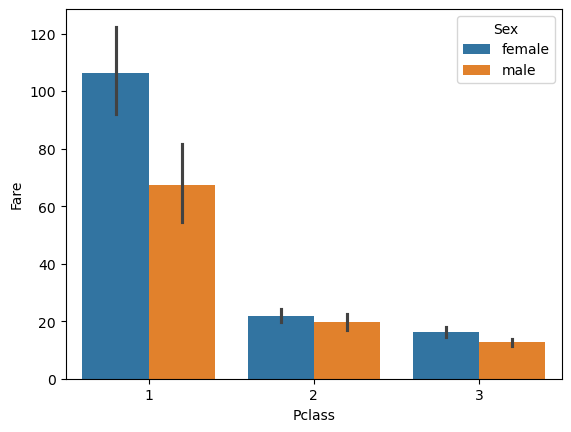

In [45]:
sns.barplot(x= df['Pclass'], y= df['Fare'], hue= df['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

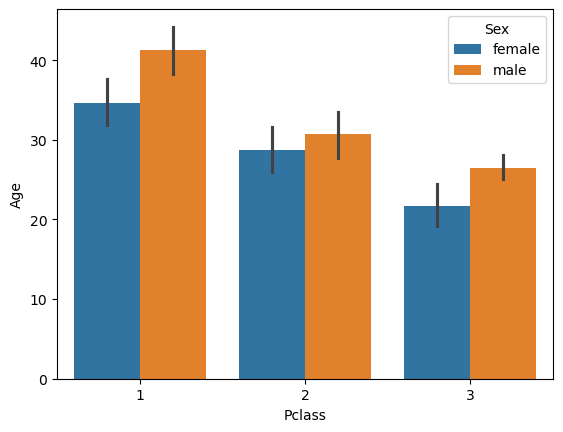

In [46]:
sns.barplot(x= df['Pclass'], y= df['Age'], hue= df['Sex'])

## c. Box Plot (N-C)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

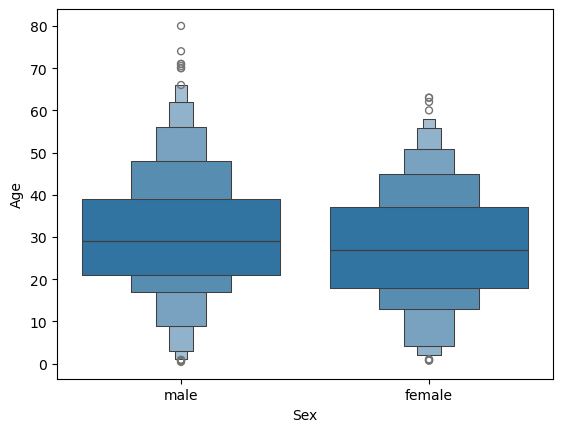

In [50]:
sns.boxenplot(x=df['Sex'], y=df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

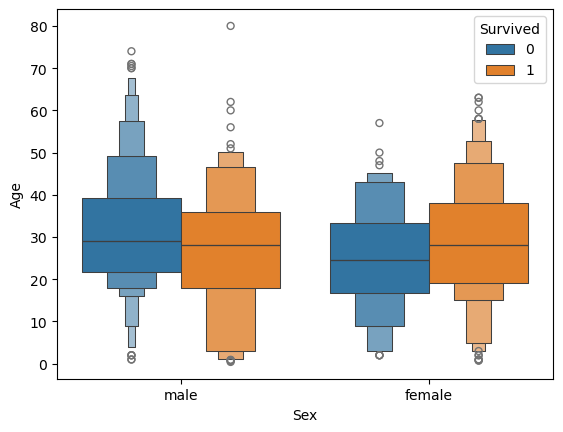

In [51]:
sns.boxenplot(x= df['Sex'] , y=df['Age'], hue=df['Survived'])

## d. Distplot (N-C)

/tmp/ipykernel_3277/1090635992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[df['Survived'] ==1]['Age'], hist= False)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

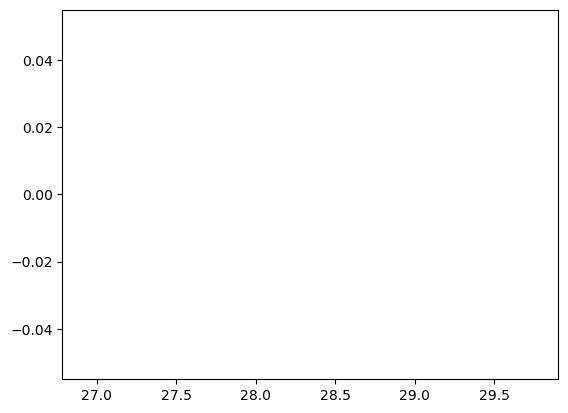

In [58]:
sns.distplot(x=df[df['Survived'] ==0]['Age'], hist= False)
sns.distplot(x=df[df['Survived'] ==1]['Age'], hist= False)

## e. HeatMap (C-C)

In [62]:
crosstab = pd.crosstab(df['Survived'], df['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

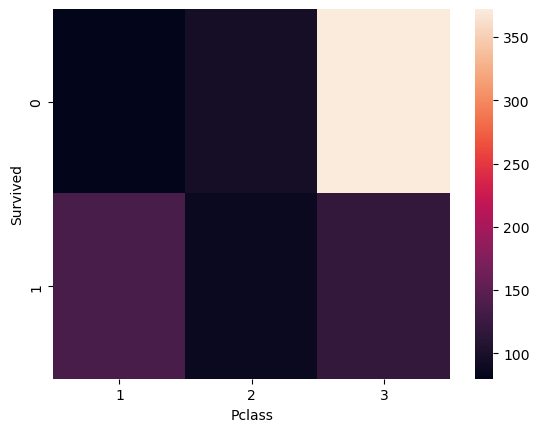

In [64]:
sns.heatmap(crosstab)

## f. ClusterMap (C-C)

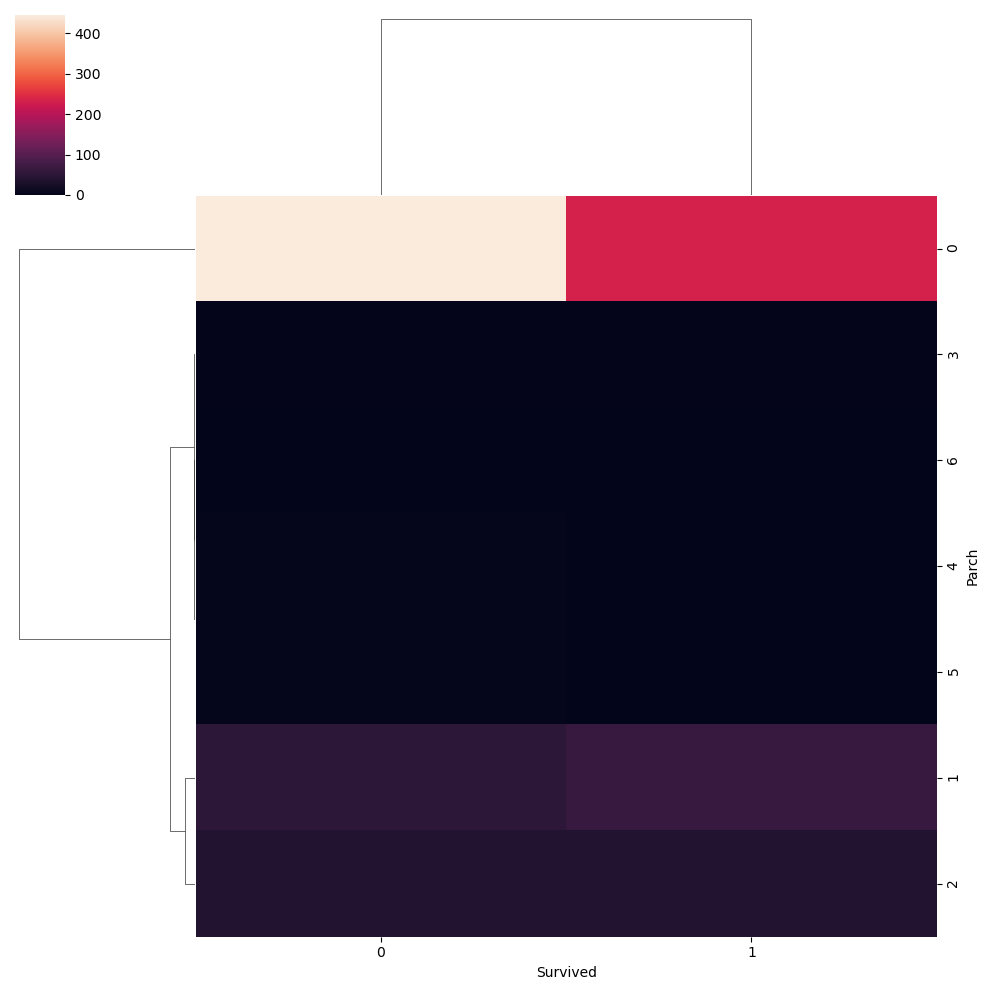

In [67]:
crosstab = pd.crosstab(df['Parch'], df['Survived'])
sns.clustermap(crosstab)

## g. Pairplot

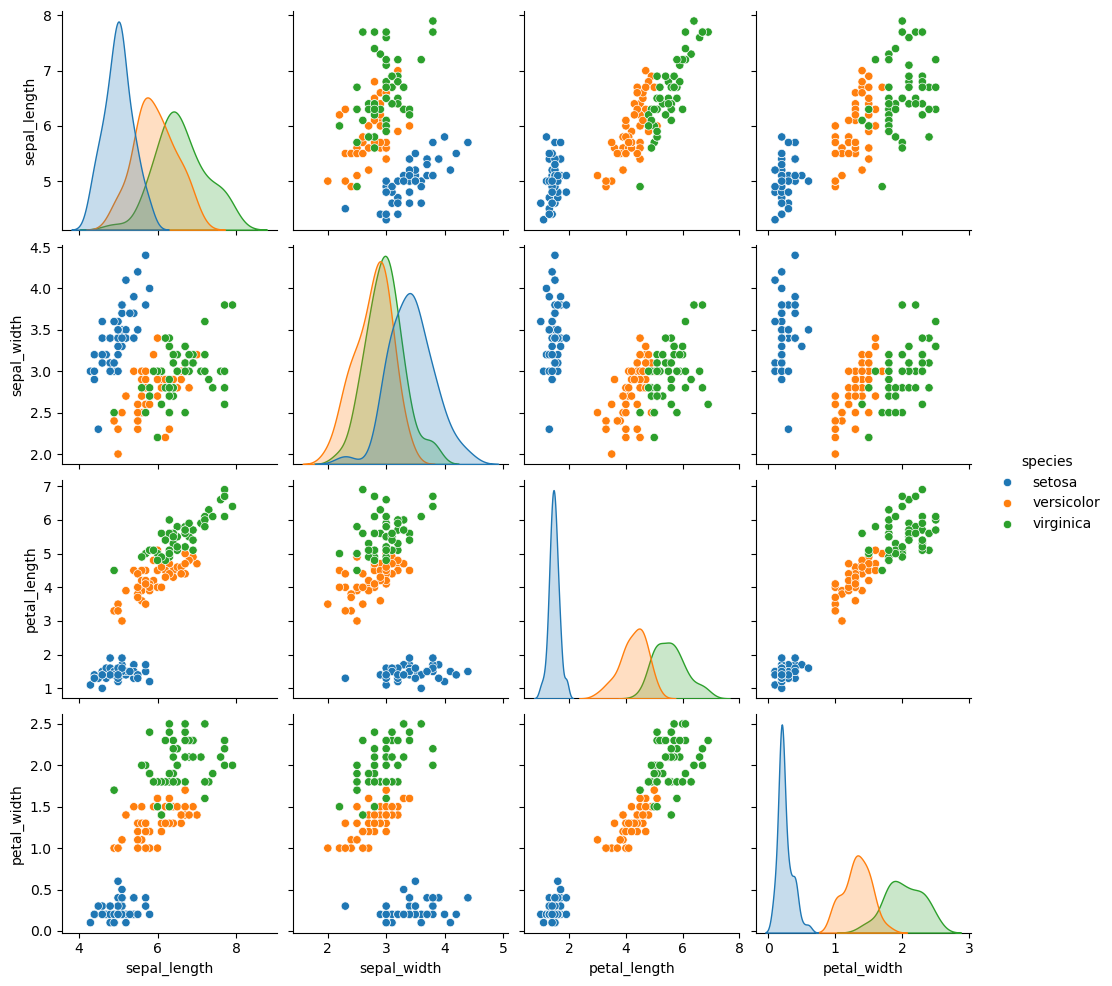

In [70]:
iris = pd.read_csv('iris.csv')

sns.pairplot(iris, hue='species')

## h. Lineplot (N-N)

In [75]:
flights = pd.read_csv('flights.csv')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

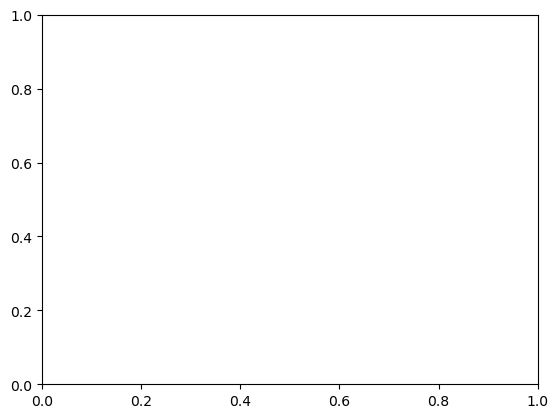

In [76]:
new = flights.groupby('year').sum().reset_index()
sns.lineplot(x=new['year'], y=new['passengers'])

# 2. Feature Scaling

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
y= df['Survived']
x = df.drop(['Survived','Name','PassengerId','Ticket','Cabin'], axis=1)

## a. Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [107]:
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [108]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,male,51.0,0,0,26.5500,S
52,1,female,49.0,1,0,76.7292,C
386,3,male,1.0,5,2,46.9000,S
124,1,male,54.0,0,1,77.2875,S
578,3,female,NaN,1,0,14.4583,C
...,...,...,...,...,...,...,...
835,1,female,39.0,1,1,83.1583,C
192,3,female,19.0,1,0,7.8542,S
629,3,male,NaN,0,0,7.7333,Q
559,3,female,36.0,1,0,17.4000,S


# OneHot Encoding

In [112]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [113]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [114]:
X_train_new = ohe.fit_transform(X_train[['Sex','Embarked']])

/home/cyberghost/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [115]:
X_test_new = ohe.transform(X_test[['Sex','Embarked']])

In [118]:
X_train_new.shape

(623, 4)

In [122]:
X_train[['Pclass','Age','SibSp', 'Parch', 'Fare']].values

array([[ 1.    , 51.    ,  0.    ,  0.    , 26.55  ],
       [ 1.    , 49.    ,  1.    ,  0.    , 76.7292],
       [ 3.    ,  1.    ,  5.    ,  2.    , 46.9   ],
       ...,
       [ 3.    ,     nan,  0.    ,  0.    ,  7.7333],
       [ 3.    , 36.    ,  1.    ,  0.    , 17.4   ],
       [ 2.    , 60.    ,  1.    ,  1.    , 39.    ]])

In [127]:
X_train = np.hstack((X_train[['Pclass','Age','SibSp', 'Parch', 'Fare']].values, X_train_new))

X_test = np.hstack((X_test[['Pclass','Age','SibSp', 'Parch', 'Fare']].values, X_test_new))

In [131]:
X_test.shape

(268, 9)

## Standard Scalar

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [134]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'